In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [8]:
# Code starts here


train = pd.read_csv('E:/GreyAtom/glab proj/Predict the Insurance Claim using Logistic Regression/train.csv')
train.head()


,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,1182,25,0,30.30,0,0,3,2632.9920,1
1,990,26,0,19.80,1,0,3,3378.9100,0
2,123,44,1,31.35,1,1,0,39556.4945,1
3,184,44,1,30.69,2,0,2,7731.4271,0
4,1167,29,0,24.60,2,0,3,4529.4770,0


In [3]:
train.shape

(1070, 9)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   age             1070 non-null   int64  
 2   sex             1070 non-null   int64  
 3   bmi             1070 non-null   float64
 4   children        1070 non-null   int64  
 5   smoker          1070 non-null   int64  
 6   region          1070 non-null   int64  
 7   charges         1070 non-null   float64
 8   insuranceclaim  1070 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 75.3 KB


In [5]:
train.describe()

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,668.617757,39.030841,0.495327,30.490196,1.128037,0.203738,1.516822,13262.895208,0.568224
std,385.470930,13.951271,0.500212,6.109707,1.211675,0.402965,1.110035,12125.948212,0.495555
min,1.000000,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,333.250000,27.000000,0.000000,26.030000,0.000000,0.000000,1.000000,4651.971162,0.000000
50%,676.500000,39.000000,0.000000,30.140000,1.000000,0.000000,2.000000,9341.303300,1.000000
75%,1000.500000,51.000000,1.000000,34.320000,2.000000,0.000000,2.000000,17117.636460,1.000000
max,1337.000000,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
#Drop ID
train.drop('Id', axis=1, inplace=True)
train.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,25,0,30.30,0,0,3,2632.9920,1
1,26,0,19.80,1,0,3,3378.9100,0
2,44,1,31.35,1,1,0,39556.4945,1
3,44,1,30.69,2,0,2,7731.4271,0
4,29,0,24.60,2,0,3,4529.4770,0


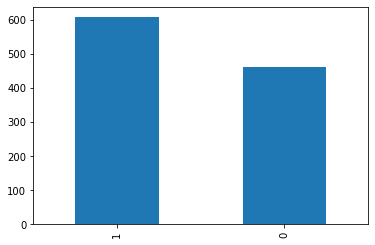

In [11]:
#Checking for distribution of target
train['insuranceclaim'].value_counts().plot(kind='bar')

In [12]:
#Checking for skewness for features
train.skew()

age               0.071193
sex               0.018719
bmi               0.357077
children          0.900842
smoker            1.473163
region           -0.036303
charges           1.521464
insuranceclaim   -0.275861
dtype: float64

### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

{'whiskers': [<matplotlib.lines.Line2D at 0x1dc69cb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1dc88358>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dc69178>],
 'medians': [<matplotlib.lines.Line2D at 0x1dc56f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dc56b68>],
 'means': []}

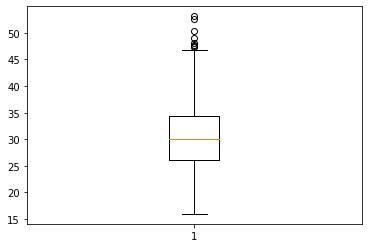

In [13]:
# Code starts here

plt.boxplot(train['bmi'])

In [15]:
train['insuranceclaim'].value_counts(normalize=True)

1    0.568224
0    0.431776
Name: insuranceclaim, dtype: float64

In [16]:
train.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.026319,0.091499,0.061800,-0.012933,0.006400,0.316429,0.083923
sex,-0.026319,1.000000,0.047436,0.032628,0.074341,0.018674,0.057600,0.022043
bmi,0.091499,0.047436,1.000000,0.033350,0.005660,0.158037,0.197609,0.366515
children,0.061800,0.032628,0.033350,1.000000,0.021243,0.027956,0.088766,-0.386124
smoker,-0.012933,0.074341,0.005660,0.021243,1.000000,0.006970,0.778644,0.342564
region,0.006400,0.018674,0.158037,0.027956,0.006970,1.000000,-0.001329,0.014917
charges,0.316429,0.057600,0.197609,0.088766,0.778644,-0.001329,1.000000,0.306518
insuranceclaim,0.083923,0.022043,0.366515,-0.386124,0.342564,0.014917,0.306518,1.000000


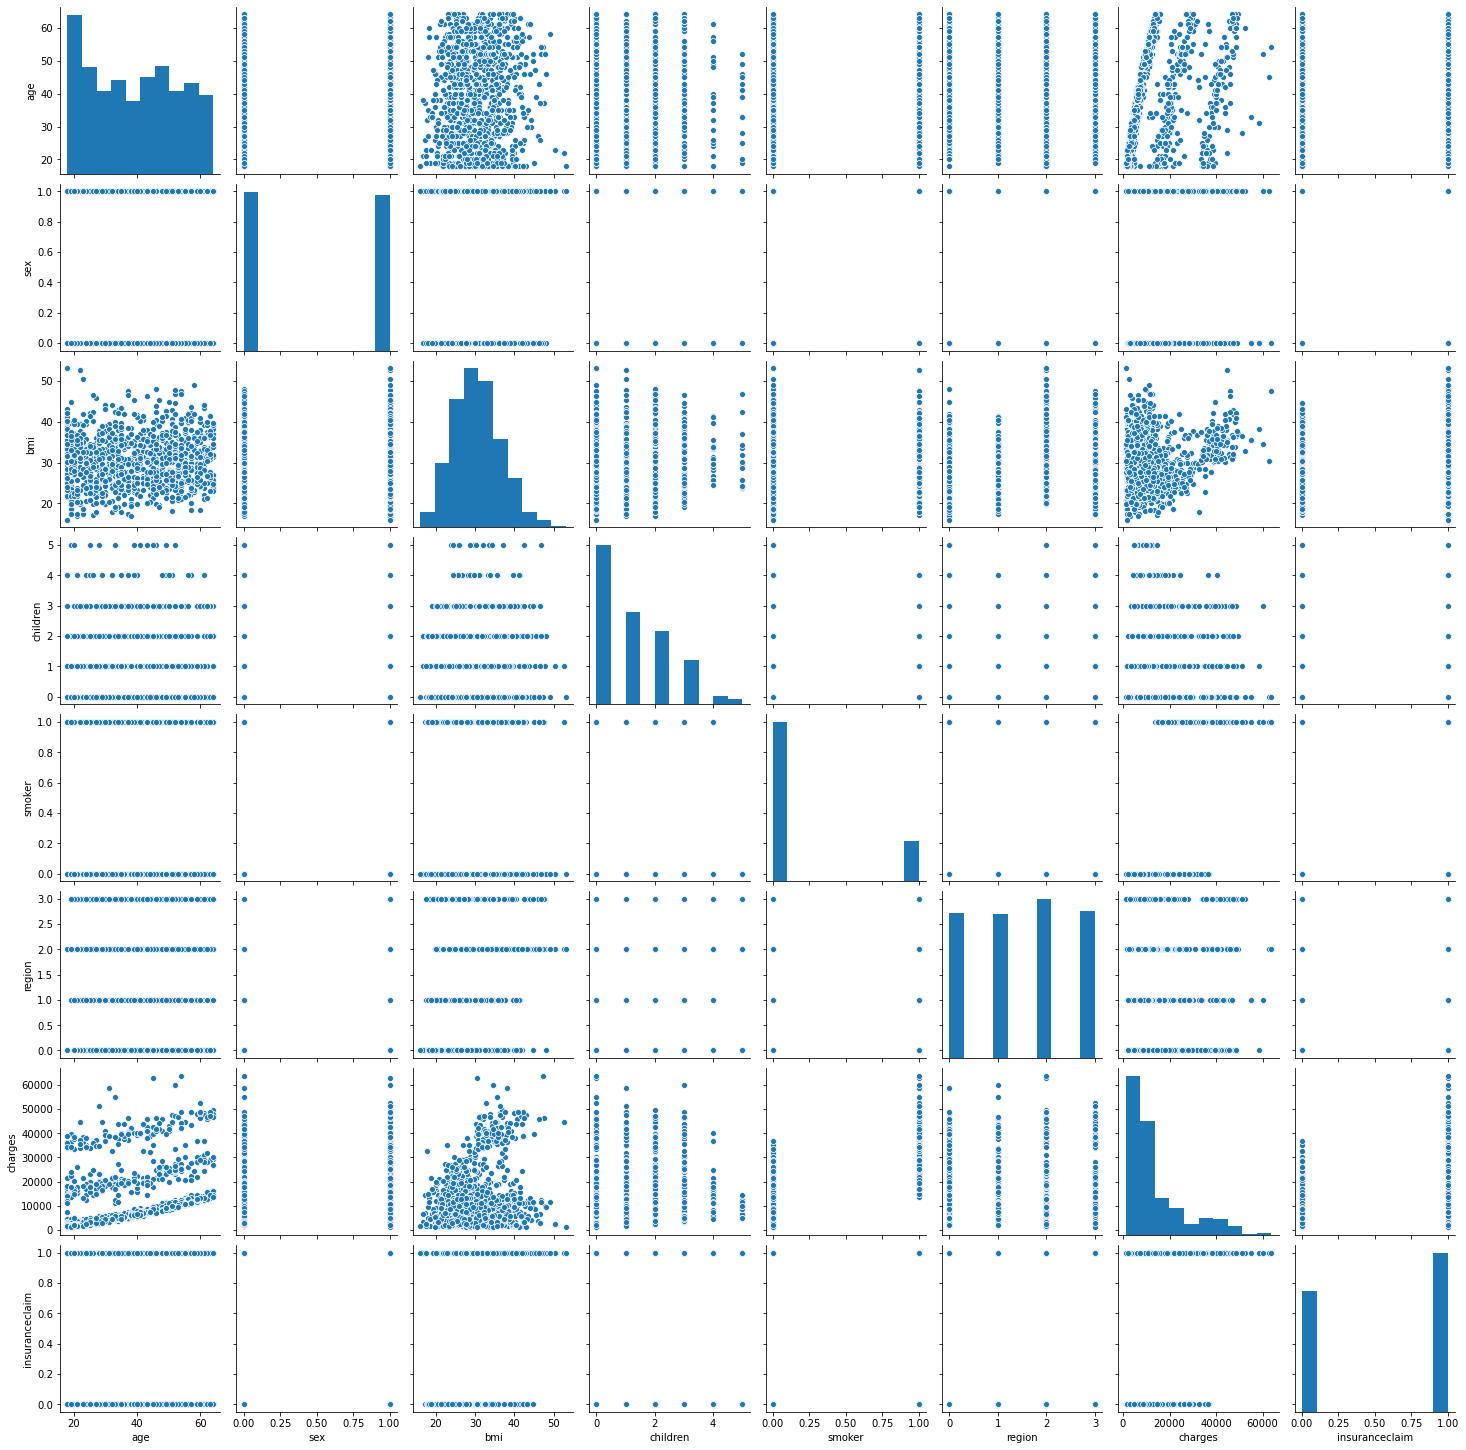

In [17]:
sns.pairplot(train)

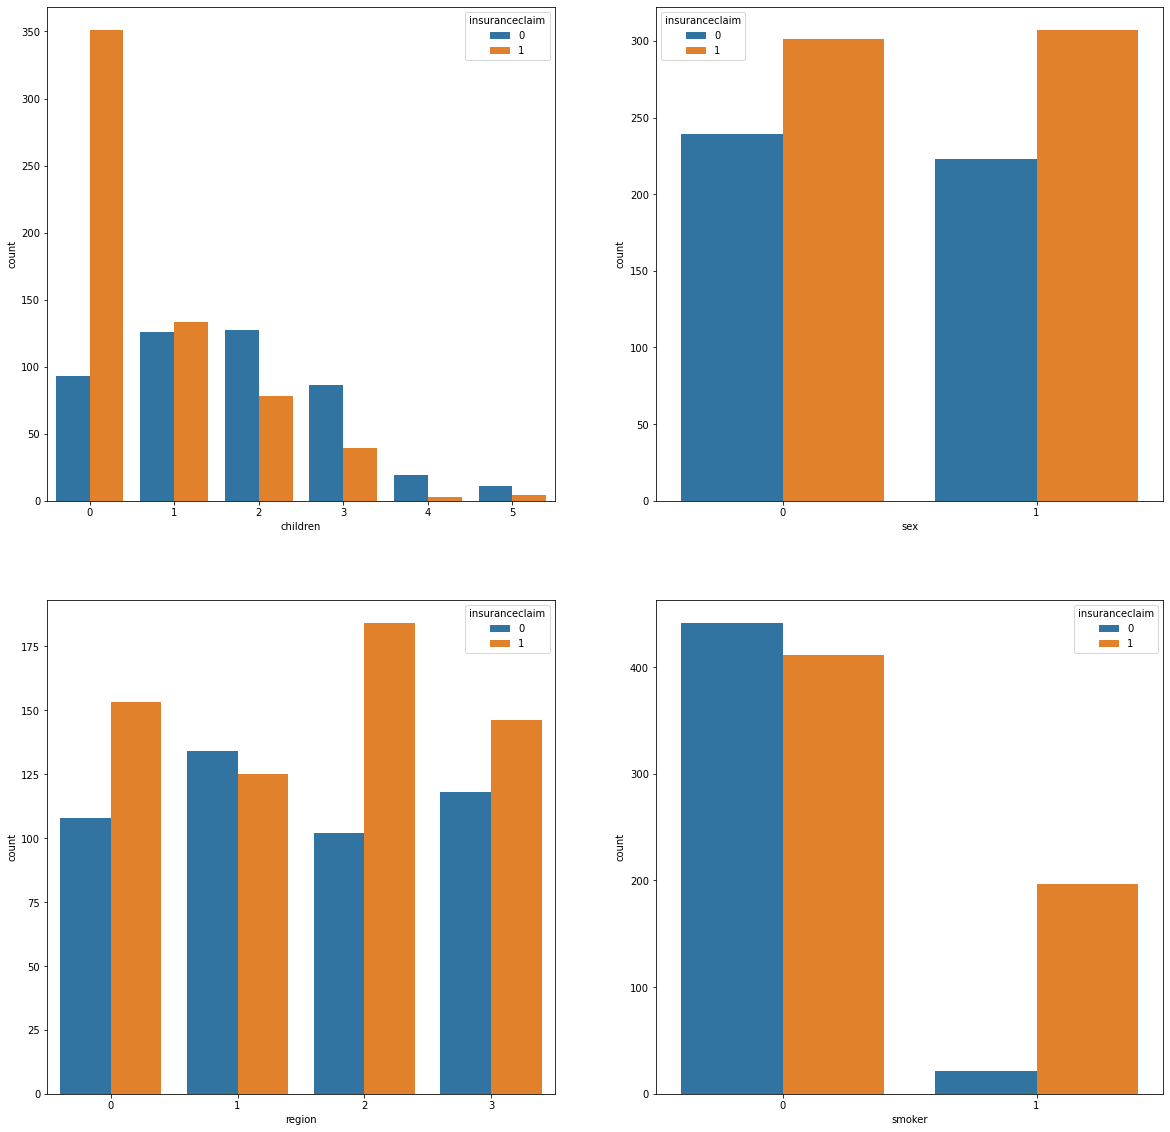

In [19]:
#Check count_plot for different features vs target variable insuranceclaim
# This will tell us which features are highly correlated with the target variable insuranceclaim and help us predict it better.

cols = ['children', 'sex', 'region', 'smoker']

fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

for i in range(0,2):
    for j in range(0,2):
        col = cols[i*2 + j]
        sns.countplot(x=train[col], hue=train['insuranceclaim'], ax=axes[i,j])

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [23]:
# Code starts here

#Store independent and dependent variable
X = train.drop('insuranceclaim', axis=1)
y=train['insuranceclaim']


In [43]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [44]:
#Instantiate Logistic regression model
lr = LogisticRegression(random_state=9)

In [45]:
#Grid search on Logistic regression

lr.fit(X_train, y_train)

LogisticRegression(random_state=9)

In [46]:
#make predictions
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy is : ',accuracy)

Accuracy is :  0.7850467289719626


In [48]:
score = roc_auc_score(y_test, y_pred)
print('Score is : ', score)

Score is :  0.7825268817204301


0.7825268817204301


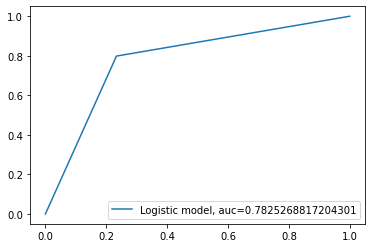

In [49]:
#visualize performance of a binary classifier.


fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [50]:
# Code starts here

test = pd.read_csv('E:/GreyAtom/glab proj/Predict the Insurance Claim using Logistic Regression/test.csv')
test.head()


,Id,age,sex,bmi,children,smoker,region,charges
0,811,33,0,42.940,3,0,1,6360.99360
1,973,19,0,40.500,0,0,3,1759.33800
2,308,58,1,34.865,0,0,0,11944.59435
3,845,60,0,32.450,0,1,2,45008.95550
4,1050,44,0,36.955,1,0,1,8023.13545


In [42]:
id_ = test['Id']

# Applying same transformation on test
test.drop('Id',axis=1,inplace=True)

# make predictions 
y_pred_test =lr.predict(test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'insuranceclaim':y_pred_test})
sample_submission.head()


In [ ]:
# Convert the sample submission file into a csv file
sample_submission.to_csv('Sample_submission_1.csv',index=False)